In [6]:
from drop_lib2 import *
from scipy.io import loadmat
import pickle
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.signal import periodogram, spectrogram
import matplotlib.pyplot as plt
import numpy as np
import librosa

directory = 'mfcc'
directory_to_save(directory)
verbose = 1
data = load_data(verbose=verbose)
segments = data['segments']
speed_labels = data['speed_labels']
volume_labels = data['volume_labels']
unique_speeds = data['unique_speeds']
unique_volumes = data['unique_volumes']

Loaded segments shape: (842, 25000)
Speed labels shape: (842,)
Volume labels shape: (842,)
Unique speeds: [1.72 2.08 2.36 2.64 3.13 3.39 3.42]
Unique volumes: [55 77]


In [7]:
# %% Feature extraction
def extract_mfcc_features(signals, sample_rate=44100, n_mfcc=40):
    features = []
    for signal in signals:
        signal = np.asarray(signal).astype(np.float32)
        mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)
        features.append(mfcc)
    return np.array(features)

# Extract MFCC features
X_mfcc = extract_mfcc_features(segments)
print(f"Extracted MFCC features shape: {X_mfcc.shape}")
X = X_mfcc.reshape(X_mfcc.shape[0], -1)
print(f"Reshaped features shape: {X.shape}")

Extracted MFCC features shape: (842, 40, 49)
Reshaped features shape: (842, 1960)


 20%|██        | 1/5 [00:40<02:43, 40.91s/it]

Velocity accuracy (fold): 0.9586


 40%|████      | 2/5 [01:26<02:11, 43.81s/it]

Velocity accuracy (fold): 0.9172


 60%|██████    | 3/5 [02:10<01:27, 43.67s/it]

Velocity accuracy (fold): 0.9286


 80%|████████  | 4/5 [02:52<00:43, 43.08s/it]

Velocity accuracy (fold): 0.9464


100%|██████████| 5/5 [03:39<00:00, 43.87s/it]


Velocity accuracy (fold): 0.9643
Velocity accuracy average across all folds: 0.9430±0.0178


 20%|██        | 1/5 [00:17<01:10, 17.50s/it]

Volume accuracy (fold): 0.8935


 40%|████      | 2/5 [00:35<00:53, 17.98s/it]

Volume accuracy (fold): 0.8876


 60%|██████    | 3/5 [00:53<00:35, 17.78s/it]

Volume accuracy (fold): 0.8810


 80%|████████  | 4/5 [01:10<00:17, 17.54s/it]

Volume accuracy (fold): 0.9226


100%|██████████| 5/5 [01:28<00:00, 17.63s/it]

Volume accuracy (fold): 0.9048
Volume accuracy average across all folds - : 0.8979±0.0146
Results saved in directory: ./mfcc/
[[100   0   3   0   0   0   0]
 [  0 114   0   2   0   6   0]
 [  2   0 111   0   0   0   0]
 [  0   0   0 181   0   1   0]
 [  0   0   0   0  75   0  13]
 [  0   3   0   8   0 131   0]
 [  0   0   1   0   9   0  82]]
[[317  52]
 [ 34 439]]


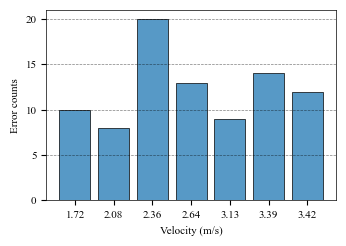

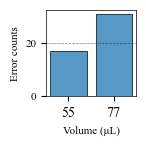

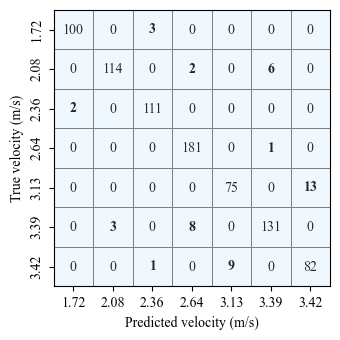

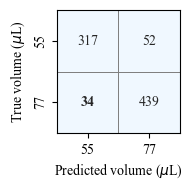

In [8]:
classifier = HistGradientBoostingClassifier(max_iter=250,
                                            random_state=42)
confusion_matrices_speed, error_indices_speed, all_cv_scores_speed, \
confusion_matrices_volume, error_indices_volume, all_cv_scores_volume\
    = evaluate_classifier(classifier, classifier, X, data, random_state=42)
save_results(confusion_matrices_speed, error_indices_speed, all_cv_scores_speed,
             confusion_matrices_volume, error_indices_volume, all_cv_scores_volume,
             data,
             directory=directory, verbose=verbose)
plot_results(confusion_matrices_speed, error_indices_speed,
             confusion_matrices_volume, error_indices_volume,
             data,
             directory=directory, verbose=verbose)